# Case Study by Yazhini

# 1.    Perform data preparation & cleaning

# 1.1  Load the dataset into a data frame using Pandas

In [1]:
import pandas as pd
import numpy as np

# Load the dataset
file_path = "C:/Users/sakthi/Downloads/API_MYS_DS2_en_csv_v2_8636/API_MYS_DS2_en_csv_v2_8636.csv"
data = pd.read_csv(file_path, skiprows=4)  # Skip metadata rows

# Display basic info
print(data.head())


  Country Name Country Code  \
0     Malaysia          MYS   
1     Malaysia          MYS   
2     Malaysia          MYS   
3     Malaysia          MYS   
4     Malaysia          MYS   

                                      Indicator Name    Indicator Code  1960  \
0         Intentional homicides (per 100,000 people)    VC.IHR.PSRC.P5   NaN   
1  Internally displaced persons, new displacement...       VC.IDP.NWDS   NaN   
2  Voice and Accountability: Percentile Rank, Upp...  VA.PER.RNK.UPPER   NaN   
3                 Voice and Accountability: Estimate            VA.EST   NaN   
4              High-technology exports (current US$)    TX.VAL.TECH.CD   NaN   

   1961  1962  1963  1964  1965  ...          2015          2016  \
0   NaN   NaN   NaN   NaN   NaN  ...  1.602893e+00  1.446406e+00   
1   NaN   NaN   NaN   NaN   NaN  ...  2.100000e+04  1.800000e+04   
2   NaN   NaN   NaN   NaN   NaN  ...  4.088670e+01  3.940887e+01   
3   NaN   NaN   NaN   NaN   NaN  ... -3.914032e-01 -4.167139

# 1.2  Explore the number of rows & columns, ranges of values etc.

In [2]:
# Get the shape of the dataset
print("Number of rows and columns:", data.shape)


Number of rows and columns: (1496, 69)


In [3]:
# Get column names
print("Columns:", data.columns.tolist())


Columns: ['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code', '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968', '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023', 'Unnamed: 68']


In [4]:
# Check data types and missing values
print(data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1496 entries, 0 to 1495
Data columns (total 69 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    1496 non-null   object 
 1   Country Code    1496 non-null   object 
 2   Indicator Name  1496 non-null   object 
 3   Indicator Code  1496 non-null   object 
 4   1960            220 non-null    float64
 5   1961            252 non-null    float64
 6   1962            255 non-null    float64
 7   1963            252 non-null    float64
 8   1964            262 non-null    float64
 9   1965            267 non-null    float64
 10  1966            266 non-null    float64
 11  1967            297 non-null    float64
 12  1968            302 non-null    float64
 13  1969            309 non-null    float64
 14  1970            471 non-null    float64
 15  1971            440 non-null    float64
 16  1972            440 non-null    float64
 17  1973            413 non-null    f

In [5]:
# View summary statistics for numeric columns
print(data.describe())

               1960          1961          1962          1963          1964  \
count  2.200000e+02  2.520000e+02  2.550000e+02  2.520000e+02  2.620000e+02   
mean   1.692312e+09  1.513481e+09  1.605862e+09  1.741254e+09  1.754123e+09   
std    5.949267e+09  5.811610e+09  6.147385e+09  6.489999e+09  6.703129e+09   
min   -5.470005e+08 -6.910004e+08 -9.561704e+08 -2.292788e+09 -2.036932e+09   
25%    9.079507e+00  6.999779e+00  6.585237e+00  7.502158e+00  5.875654e+00   
50%    1.770223e+02  8.922748e+01  8.780000e+01  8.369833e+01  6.513626e+01   
75%    4.308750e+08  1.302484e+08  5.096007e+07  1.105883e+08  9.390170e+07   
max    4.226764e+10  4.301826e+10  4.730725e+10  4.929775e+10  5.214925e+10   

               1965          1966          1967          1968          1969  \
count  2.670000e+02  2.660000e+02  2.970000e+02  3.020000e+02  3.090000e+02   
mean   1.866548e+09  1.966566e+09  1.814703e+09  1.867178e+09  1.925060e+09   
std    7.149571e+09  7.550353e+09  7.374938e+09  7.

# 1.3	Handle missing, incorrect and invalid data

In [7]:
# Check for missing values
missing_values = data.isnull().sum()
print("Missing values:\n", missing_values)

# Drop columns with more than 50% missing data (if applicable)
threshold = len(data) * 0.5
data = data.loc[:, data.isnull().sum() < threshold]

# Fill missing numeric values with median
data = data.fillna(data.median(numeric_only=True))

# Replace invalid values (e.g., negative values in a count column)
numeric_cols = data.select_dtypes(include=np.number).columns
for col in numeric_cols:
    data[col] = data[col].apply(lambda x: np.nan if x < 0 else x)

# Re-check for missing values
print("\nMissing values after cleaning:\n", data.isnull().sum())


Missing values:
 Country Name       0
Country Code       0
Indicator Name     0
Indicator Code     0
1996              35
1997              33
1998              38
1999              22
2000              23
2001              34
2002              25
2003              23
2004              20
2005              29
2006              24
2007              24
2008              25
2009              38
2010              34
2011              22
2012              21
2013              33
2014              23
2015              32
2016              30
2017              28
2018              36
2019              38
2020              56
2021              23
2022              20
dtype: int64

Missing values after cleaning:
 Country Name      0
Country Code      0
Indicator Name    0
Indicator Code    0
1996              0
1997              0
1998              0
1999              0
2000              0
2001              0
2002              0
2003              0
2004              0
2005              0
2006  

# 1.4     Perform any additional steps (parsing dates, creating additional columns, merging multiple dataset etc.)


# 1.4.1  Parsing Dates and Additional Cleaning

In [8]:
# If there are year columns (e.g., 1960, 1961), convert them to long format
id_vars = ['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code']
value_vars = [col for col in data.columns if col.isdigit()]  # Year columns
data_long = pd.melt(data, id_vars=id_vars, value_vars=value_vars, 
                    var_name='Year', value_name='Value')

# Convert Year to datetime
data_long['Year'] = pd.to_datetime(data_long['Year'], format='%Y')

# Handle outliers (e.g., extreme values in 'Value' column)
q1 = data_long['Value'].quantile(0.25)
q3 = data_long['Value'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
data_long['Value'] = data_long['Value'].apply(lambda x: np.nan if x < lower_bound or x > upper_bound else x)


# 1.4.2  Create Derived Columns

In [11]:
# Step 1: Capture rows before change
before_change = data_long[
    (data_long['Indicator Name'] == 'Intentional homicides (per 100,000 people)') & 
    (data_long['Value'] > 2)
].copy()

print("Rows before the change:")
print(before_change.head(5))

# Step 2: Apply the transformation
# Flag rows with high homicide rates (>2 per 100,000 people)
data_long['High_Homicide'] = data_long.apply(
    lambda row: 1 if row['Indicator Name'] == 'Intentional homicides (per 100,000 people)' and row['Value'] > 2 else 0, 
    axis=1
)

# Step 3: Display rows after the change
after_change = data_long[data_long['High_Homicide'] == 1]

print("\nRows after the change:")
print(after_change.head(5))


Rows before the change:
     Country Name Country Code                              Indicator Name  \
0        Malaysia          MYS  Intentional homicides (per 100,000 people)   
1496     Malaysia          MYS  Intentional homicides (per 100,000 people)   
2992     Malaysia          MYS  Intentional homicides (per 100,000 people)   
4488     Malaysia          MYS  Intentional homicides (per 100,000 people)   
5984     Malaysia          MYS  Intentional homicides (per 100,000 people)   

      Indicator Code       Year     Value  
0     VC.IHR.PSRC.P5 1996-01-01  2.160563  
1496  VC.IHR.PSRC.P5 1997-01-01  2.541275  
2992  VC.IHR.PSRC.P5 1998-01-01  2.883926  
4488  VC.IHR.PSRC.P5 1999-01-01  2.628678  
5984  VC.IHR.PSRC.P5 2000-01-01  2.401379  

Rows after the change:
     Country Name Country Code                              Indicator Name  \
0        Malaysia          MYS  Intentional homicides (per 100,000 people)   
1496     Malaysia          MYS  Intentional homicides (per 100,

# 1.4.3  Reverse the change by drop

In [10]:
# Reverse the change by dropping the 'High_Homicide' column
data_long.drop(columns=['High_Homicide'], inplace=True)

print("Change reversed. Current columns in the dataset:")
print(data_long.columns)



Change reversed. Current columns in the dataset:
Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       'Year', 'Value'],
      dtype='object')


# 1.4.4  Merging

In [18]:
# Load another dataset for merging
other_data = pd.read_csv("C:/Users/sakthi/Downloads/API_MYS_DS2_en_csv_v2_8636/Metadata_Indicator_API_MYS_DS2_en_csv_v2_8636.csv")

# Perform the merge with corrected column mappings
merged_data = pd.merge(data_long, other_data, 
                       left_on='Indicator Code', 
                       right_on='INDICATOR_CODE', 
                       how='inner')

# Display datasets before and after the merge
print("Dataset before the merge (data_long):")
print(data_long.head(5))  # Preview data_long

print("\nOther dataset to be merged (other_data):")
print(other_data.head(5))  # Preview other_data

print("\nDataset after the merge:")
print(merged_data.head(5))  # Preview merged_data




Dataset before the merge (data_long):
  Country Name Country Code  \
0     Malaysia          MYS   
1     Malaysia          MYS   
2     Malaysia          MYS   
3     Malaysia          MYS   
4     Malaysia          MYS   

                                      Indicator Name    Indicator Code  \
0         Intentional homicides (per 100,000 people)    VC.IHR.PSRC.P5   
1  Internally displaced persons, new displacement...       VC.IDP.NWDS   
2  Voice and Accountability: Percentile Rank, Upp...  VA.PER.RNK.UPPER   
3                 Voice and Accountability: Estimate            VA.EST   
4              High-technology exports (current US$)    TX.VAL.TECH.CD   

        Year      Value  High_Homicide  
0 1996-01-01   2.160563              1  
1 1996-01-01  40.018551              0  
2 1996-01-01  56.500000              0  
3 1996-01-01  40.018551              0  
4 1996-01-01  40.018551              0  

Other dataset to be merged (other_data):
     INDICATOR_CODE                       

# Summary Insights

In [20]:
# Group data by country and get mean homicide rates
homicide_stats = data_long[data_long['Indicator Name'] == 'Intentional homicides (per 100,000 people)'] \
    .groupby('Country Name')['Value'].mean().reset_index()

# Print insights
print("Homicide Statistics by Country:\n", homicide_stats)


Homicide Statistics by Country:
   Country Name     Value
0     Malaysia  3.944421


# Saving final cleaned dataset file

In [21]:
# Save the cleaned dataset to a new file
cleaned_file_path = 'cleaned_API_MYS_DS2.csv'
data_long.to_csv(cleaned_file_path, index=False)


# Queries Using Pandas & NumPy 
(After all clealing work done)

In [22]:
# Check Data for Specific Indicators:

homicide_data = data_long[data_long['Indicator Name'] == 'Intentional homicides (per 100,000 people)']
print(homicide_data.head())


     Country Name Country Code                              Indicator Name  \
0        Malaysia          MYS  Intentional homicides (per 100,000 people)   
1496     Malaysia          MYS  Intentional homicides (per 100,000 people)   
2992     Malaysia          MYS  Intentional homicides (per 100,000 people)   
4488     Malaysia          MYS  Intentional homicides (per 100,000 people)   
5984     Malaysia          MYS  Intentional homicides (per 100,000 people)   

      Indicator Code       Year     Value  High_Homicide  
0     VC.IHR.PSRC.P5 1996-01-01  2.160563              1  
1496  VC.IHR.PSRC.P5 1997-01-01  2.541275              1  
2992  VC.IHR.PSRC.P5 1998-01-01  2.883926              1  
4488  VC.IHR.PSRC.P5 1999-01-01  2.628678              1  
5984  VC.IHR.PSRC.P5 2000-01-01  2.401379              1  


In [23]:
# Find Countries with Missing Data for a Specific Year:

missing_countries = data_long[(data_long['Year'] == '2000') & (data_long['Value'].isnull())]['Country Name'].unique()
print("Countries with missing data for 2000:", missing_countries)


Countries with missing data for 2000: ['Malaysia']


In [24]:
# Calculate Mean Values by Indicator:

mean_values = data_long.groupby('Indicator Name')['Value'].mean()
print(mean_values)


Indicator Name
ARI treatment (% of children under 5 taken to a health provider)                                  46.976174
Access to clean fuels and technologies for cooking (% of population)                              86.662191
Access to clean fuels and technologies for cooking, rural (% of rural population)                 83.689968
Access to clean fuels and technologies for cooking, urban (% of urban population)                 89.884413
Access to electricity (% of population)                                                           91.217746
                                                                                                    ...    
Women who believe a husband is justified in beating his wife when she refuses sex with him (%)    45.170261
Women who were first married by age 15 (% of women ages 20-24)                                    45.170261
Women who were first married by age 18 (% of women ages 20-24)                                    45.170261
Women's share

In [25]:
# Find the Year with Maximum Homicides for Malaysia:

malaysia_homicides = data_long[(data_long['Country Name'] == 'Malaysia') & 
                               (data_long['Indicator Name'] == 'Intentional homicides (per 100,000 people)')]
max_homicides_year = malaysia_homicides.loc[malaysia_homicides['Value'].idxmax()]
print("Year with max homicides in Malaysia:", max_homicides_year['Year'])


Year with max homicides in Malaysia: 2022-01-01 00:00:00


# Visualisation

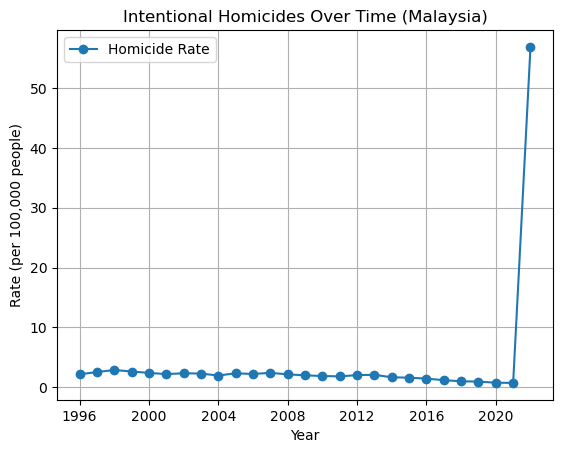

In [26]:
import matplotlib.pyplot as plt

homicide_data = data_long[data_long['Indicator Name'] == 'Intentional homicides (per 100,000 people)']
plt.plot(homicide_data['Year'], homicide_data['Value'], marker='o', label='Homicide Rate')
plt.title('Intentional Homicides Over Time (Malaysia)')
plt.xlabel('Year')
plt.ylabel('Rate (per 100,000 people)')
plt.legend()
plt.grid(True)
plt.show()